In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Airbnb data analysis
<h3>By Louise Jones</h3>

I want to look into whether an airbnb listing with nature is priced or rated differently to listings without nature (and views). I think this would be an interesting concept as if it shows that nature does have a positive impact, it may encourage listers to increase or protect the natural environment that they may have. 

The Airbnb dataset consists of 81 columns and 30,179 rows in its raw form.

In [11]:
airbnb = pd.read_csv('airbnb_nyc.csv') #load in data

In [12]:
airbnb.head() #looking at first few rows of data


,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [13]:
airbnb.shape #provides columns and rows

(30179, 81)

I noticed when first looking at the head and dataset, that the 'experiences offered' column all appeared to say none. So I deciced to look into this first as part of processing my data. 

In [14]:
experiences_count = sum(airbnb['experiences_offered'] != 'none') #created a variable to sum the amount of elements in the column 'experiences_offered' where the value != 'none'
experiences_count

0

Just to make sure, I did the same thing but changed it to == 'none', and the result showed me that for every row, the value in this field is none. 

In [15]:
experiences_count_none = sum(airbnb['experiences_offered'] == 'none') #created a variable to sum the amount of elements in the column 'experiences_offered' where the value == 'none'
experiences_count_none

30179

In [16]:
airbnb = airbnb.drop('experiences_offered', axis=1)

In [17]:
airbnb.head()

,id,name,summary,description,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,within an hour,...,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,within a day,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,NaN,NaN,NaN,17985,39953.0,within a day,...,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,within an hour,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,NaN,Metro 1 et A,NaN,26394,40014.0,NaN,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [19]:
airbnb.columns #View column names

Index(['id', 'name', 'summary', 'description', 'neighborhood_overview',
       'transit', 'house_rules', 'host_id', 'host_since', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'street', 'neighbourhood', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'calculated_host_listings_count',
       'calculated_host_listin

### Checking for missing data

In my analysis, I want to see if 'nature_and_views' impacts the price and ratings of bookings. Firstly, I want to check if there are any missing or NaN values in the 'nature_and_views' column, and how many occur for -1 and 1

In [22]:
nature = airbnb['nature_and_views']
nature.value_counts().sort_index()

-1    29942
 1      237
Name: nature_and_views, dtype: int64

In [34]:
nature_and_views_rating_price = airbnb[['nature_and_views', 'review_scores_rating', 'price']]
nature_and_views_rating_price

,nature_and_views,review_scores_rating,price
0,-1,98.0,149
1,-1,NaN,150
2,-1,NaN,190
3,-1,97.0,60
4,-1,NaN,80
...,...,...,...
30174,-1,NaN,65
30175,-1,NaN,70
30176,-1,NaN,40
30177,-1,NaN,55


When pulling the columns I'm interested in, I can see some of the review scores have no data, therefore I need to clean this up. 

In [35]:
nature_and_views_rating_price.dropna(how="any", subset=["review_scores_rating"])

,nature_and_views,review_scores_rating,price
0,-1,98.0,149
3,-1,97.0,60
6,-1,97.0,120
7,-1,96.0,150
8,-1,94.0,115
...,...,...,...
29948,-1,100.0,110
29950,-1,100.0,33
30082,-1,100.0,129
30088,-1,100.0,45


So now I have my smaller, cleaned up data set, I can start to look at some basic information.

In [37]:
nature_and_views_rating_price[['review_scores_rating', 'price']].describe()

,review_scores_rating,price
count,21094.000000,30179.000000
mean,93.643975,132.949965
std,10.155133,93.151824
min,20.000000,0.000000
25%,91.000000,65.000000
50%,98.000000,100.000000
75%,100.000000,175.000000
max,100.000000,500.000000


My average price is £132.94, and average rating is around £94. What I did notice here was the minimum price was 0, which would skew my data quite a lot. I looked into this a bit more.

In [47]:
airbnb.loc[airbnb.price == 0]

,id,name,summary,description,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,...,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
12463,18750597,"Huge Brooklyn Brownstone Living, Close to it all.","Great, Brooklyn, Brownstown. Large and bright ...","Great, Brooklyn, Brownstown. Large and bright ...",The neighborhood is friendly and lively. There...,This is a great location for every type of pub...,No parties,8993084,41539.0,within an hour,...,1,1,1,-1,1,-1,1,-1,-1,1
13911,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",We're located in a beautiful newly renovated t...,We're located in a beautiful newly renovated t...,"There are many nice venues, bars, coffee shops...","We are conveniently located near the J, M, and...",NaN,15787004,41779.0,within an hour,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
13987,20608117,"Sunny, Quiet Room in Greenpoint",Queen size bed in bedroom overlooking the back...,Queen size bed in bedroom overlooking the back...,Maybe I'm biased but Greenpoint is the best ne...,I am 15 minute walk from the L train Graham st...,Please be respectful of the space. This is my ...,1641537,40931.0,NaN,...,-1,1,1,-1,1,-1,-1,-1,1,-1
14002,20624541,Modern apartment in the heart of Williamsburg,Minimalist loft apartment with a stylish balco...,Minimalist loft apartment with a stylish balco...,Want to experience New York but Brooklyn style...,"Metro is best, taxi/uber/ lyft are at your doo...",The apartment is a smoke and drug free environ...,10132166,41597.0,within an hour,...,-1,1,-1,-1,1,-1,-1,-1,-1,-1
14607,21291569,Coliving in Brooklyn! Modern design / Shared room,"Newly renovated, modern, spacious Outpost Club...","Newly renovated, modern, spacious Outpost Club...",Bushwick is a modern neighborhood in the north...,"Halsey Street Station for J and Z train, Knick...",1) Price is per person – stay overnight is sin...,101970559,42674.0,within a few hours,...,-1,1,1,-1,-1,-1,1,-1,-1,-1
14621,21304320,Best Coliving space ever! Shared room.,The Outpost Club Co-Living residences are a be...,The Outpost Club Co-Living residences are a be...,Bushwick is a working-class neighborhood in th...,The Co-living is literally few blocks from the...,1) Price is per person – stay overnight is sin...,101970559,42674.0,within a few hours,...,-1,1,1,-1,-1,-1,1,-1,-1,-1


There are 6 entries with a price of 0, which all seem like normal airbnb listings. Therefore, I am going to drop these from my dataset so it does not skew my results - they could be errors. 

In [56]:
nature_and_views_rating_price = nature_and_views_rating_price[nature_and_views_rating_price.price != 0]

In [57]:
nature_and_views_rating_price

,nature_and_views,review_scores_rating,price
0,-1,98.0,149
1,-1,NaN,150
2,-1,NaN,190
3,-1,97.0,60
4,-1,NaN,80
...,...,...,...
30174,-1,NaN,65
30175,-1,NaN,70
30176,-1,NaN,40
30177,-1,NaN,55


In [58]:
nature_and_views_rating_price.dropna(how="any", subset=["review_scores_rating"])

,nature_and_views,review_scores_rating,price
0,-1,98.0,149
3,-1,97.0,60
6,-1,97.0,120
7,-1,96.0,150
8,-1,94.0,115
...,...,...,...
29948,-1,100.0,110
29950,-1,100.0,33
30082,-1,100.0,129
30088,-1,100.0,45


So now I have a smaller, clean data set with the information I need, with no missing or incorrect values. 

### Data analysis and visualisation

#### Price histogram

Text(0.5, 1.0, 'Prices of airbnb listings')

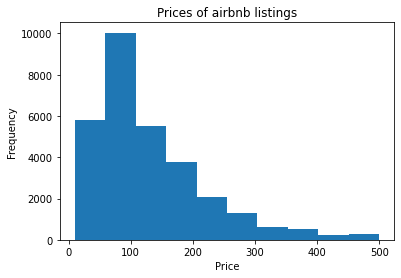

In [72]:
plt.hist(nature_and_views_rating_price['price'], bins = 10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Prices of airbnb listings')



There is a high frequency of listings around 100 dollars. Next I want to look at the distribution of ratings.

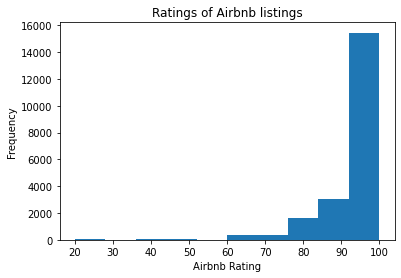

In [73]:
plt.hist(nature_and_views_rating_price['review_scores_rating'], bins = 10)
plt.xlabel('Airbnb Rating')
plt.ylabel('Frequency')
plt.title('Ratings of Airbnb listings')
plt.show()

This histogram is very skewed, and shows us that a large proportion of listings have high reviews. After looking at my histograms for a while, I wasn't sure this was the best way to visualise my data, so I decided to try some box plots. 

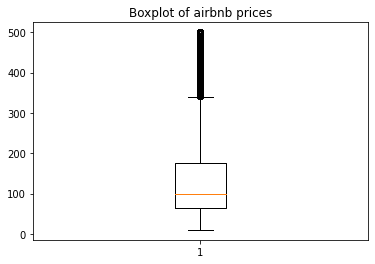

In [75]:
plt.boxplot(nature_and_views_rating_price['price'])
plt.title('Boxplot of airbnb prices')
plt.show()


### Comparing variables and their relationships

My data for nature_and_views is categorial (1 or -1), which is why I chose the barplot and categorical scatterplots.

In [86]:
nature = nature_and_views_rating_price['nature_and_views']
price = nature_and_views_rating_price['price']
rating = nature_and_views_rating_price['review_scores_rating']


<AxesSubplot: xlabel='nature_and_views', ylabel='price'>

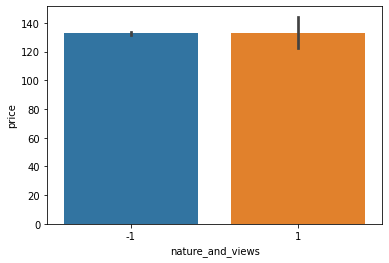

In [93]:
sns.barplot(data = nature_and_views_rating_price, x = "nature_and_views", y = "price")


<AxesSubplot: xlabel='nature_and_views', ylabel='review_scores_rating'>

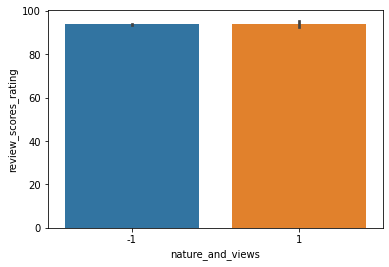

In [91]:
sns.barplot(data = nature_and_views_rating_price, x = "nature_and_views", y = "review_scores_rating")

This is what I did first, and at first glance, both look very similar and it appears there is not much difference between a listing with nature and it's price / ratings, or a listings without and its price/ratings. 

I then decided to change the error bars to standard deviation rather than confidence intervals to show the distribution rather than degree of certainty. 

<AxesSubplot: xlabel='nature_and_views', ylabel='review_scores_rating'>

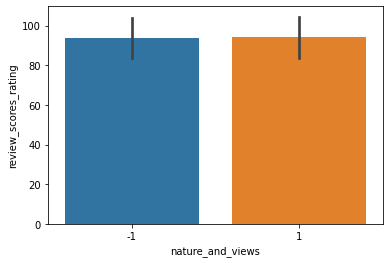

In [94]:
sns.barplot(data = nature_and_views_rating_price, x = "nature_and_views", y = "review_scores_rating", errorbar="sd")

<AxesSubplot: xlabel='nature_and_views', ylabel='price'>

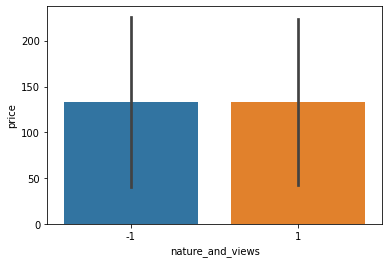

In [95]:
sns.barplot(data = nature_and_views_rating_price, x = "nature_and_views", y = "price", errorbar="sd")


For price, the standard deviation shows that the data is more spread out and not clustered around the mean. 

### Categorical scatterplots

<AxesSubplot: xlabel='nature_and_views', ylabel='price'>

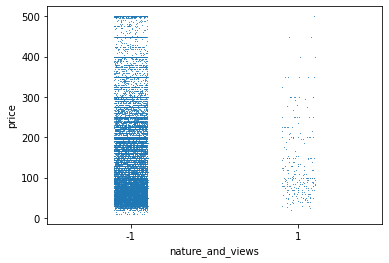

In [159]:
sns.stripplot(data=nature_and_views_rating_price, x = "nature_and_views", y = "price",size = 1.0)

<AxesSubplot: xlabel='nature_and_views', ylabel='review_scores_rating'>

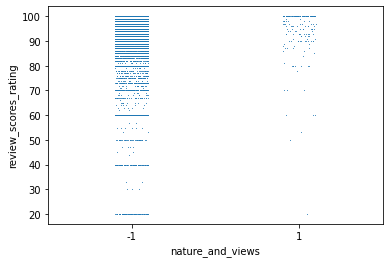

In [160]:
sns.stripplot(data=nature_and_views_rating_price, x = "nature_and_views", y = "review_scores_rating",size = 1.0)

At this point, I realised both price and ratings were being impacted because so many more listings had no nature than those that did. So I decided to select 1000 randow rows to look into.

In [153]:
sample_df = nature_and_views_rating_price.sample(n=1000)
sample_df


,nature_and_views,review_scores_rating,price
18830,-1,100.0,44
7865,-1,100.0,79
12213,-1,NaN,142
2433,-1,100.0,165
25204,-1,90.0,81
...,...,...,...
19886,-1,100.0,325
24104,-1,NaN,35
14746,-1,92.0,150
23766,-1,98.0,160


<AxesSubplot: xlabel='nature_and_views', ylabel='price'>

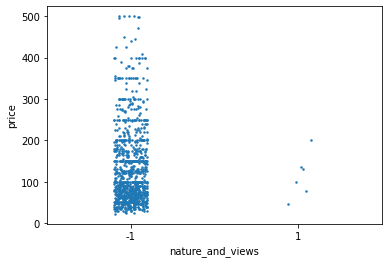

In [154]:
sns.stripplot(data=sample_df, x = "nature_and_views", y = "price", size = 2.5)

There is still a lot more data for -1, however even the listings with nature are still towards the lower / average price bracket.The previous boxplot with more data points probably shows a more confident view that listings with nature are still focused around the lower price range rather than higher. 

<AxesSubplot: xlabel='nature_and_views', ylabel='review_scores_rating'>

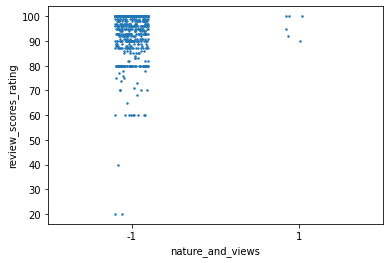

In [155]:
sns.stripplot(data=sample_df, x = "nature_and_views", y = "review_scores_rating", size = 2.5)

The same is shown for ratings - there doesn't seem to be a relationship between nature and how expensive listings are, or how highly they are rated.

<AxesSubplot: xlabel='nature_and_views', ylabel='review_scores_rating'>

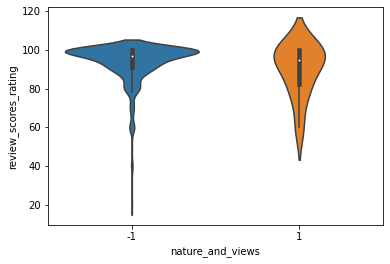

In [148]:
sns.violinplot(data=sample_df, x="nature_and_views", y="review_scores_rating")

I tried some violin plots to see if this was a nicer visualisation, which I think it is. 

<AxesSubplot: xlabel='nature_and_views', ylabel='price'>

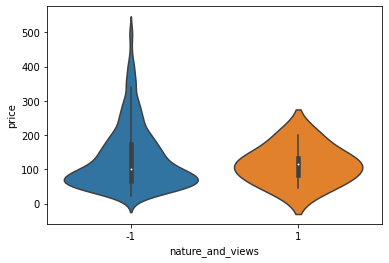

In [158]:
sns.violinplot(data=sample_df, x="nature_and_views", y="price")

From this data exploration, I can confidently say that there is no relationship between an airbnb having nature and the price or rating of it. The violin plots above show that the median for both are very similar, as well as the highest probability. Listings with and without nature both appear to be most common at round $90-$100 as well as 80-100 scores. 

The interquartile range is larger for listings with nature and their ratings, but since there are so many other factors in the main airbnb dataset, I couldn't confidently say that nature has an impact on this, especially given how similar it is to the listings without. 

274 metropolitan areas in the US have seen a loss of open space from 1990 to 2000 (Colding et al, 2020), however green spaces are often crucial to wellbeing and health. It may be useful to compare this information to other cities with airbnb listings and see if greener spaces have higher ratings or are priced differently. 

Airbnb is taking over a lot of rental markets, and is often the go-to for younger generations while on holiday or trips, so a focus on increasing nature may be beneficial for exposing a large market to a way to connect with the environment. 